In [1]:
# Naive Bayes Application

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

In [4]:
# Importing the dataset
dataset = pd.read_csv('data.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Splitting into training and test datasets

X = dataset.iloc[:, :-1].values 
y = veriseti.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_test

array([[7.00e+01, 1.00e+00, 0.00e+00, 1.45e+02, 1.74e+02, 0.00e+00,
        1.00e+00, 1.25e+02, 1.00e+00, 2.60e+00, 0.00e+00, 0.00e+00,
        3.00e+00],
       [6.40e+01, 1.00e+00, 3.00e+00, 1.70e+02, 2.27e+02, 0.00e+00,
        0.00e+00, 1.55e+02, 0.00e+00, 6.00e-01, 1.00e+00, 0.00e+00,
        3.00e+00],
       [5.90e+01, 1.00e+00, 3.00e+00, 1.70e+02, 2.88e+02, 0.00e+00,
        0.00e+00, 1.59e+02, 0.00e+00, 2.00e-01, 1.00e+00, 0.00e+00,
        3.00e+00],
       [6.00e+01, 1.00e+00, 0.00e+00, 1.25e+02, 2.58e+02, 0.00e+00,
        0.00e+00, 1.41e+02, 1.00e+00, 2.80e+00, 1.00e+00, 1.00e+00,
        3.00e+00],
       [6.20e+01, 1.00e+00, 2.00e+00, 1.30e+02, 2.31e+02, 0.00e+00,
        1.00e+00, 1.46e+02, 0.00e+00, 1.80e+00, 1.00e+00, 3.00e+00,
        3.00e+00],
       [4.80e+01, 1.00e+00, 0.00e+00, 1.24e+02, 2.74e+02, 0.00e+00,
        0.00e+00, 1.66e+02, 0.00e+00, 5.00e-01, 1.00e+00, 0.00e+00,
        3.00e+00],
       [4.00e+01, 1.00e+00, 0.00e+00, 1.10e+02, 1.67e+02, 0.00e+00,
  

In [6]:
# attribute scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train.reshape(-1,1))
y_test = scaler.fit_transform(y_test.reshape(-1,1))

In [7]:
from sklearn.naive_bayes import GaussianNB
siniflandirici = GaussianNB()
siniflandirici.fit(X_train, y_train)

C:\Users\adenon\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [8]:
y_pred = siniflandirici.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76        27
         1.0       0.83      0.74      0.78        34

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61



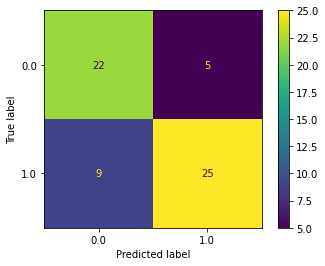

In [9]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(siniflandirici, X_test, y_test)

In [10]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[22,  5],
       [ 9, 25]], dtype=int64)

In [11]:
(cm[0][0]+cm[1][1]) / X_test.shape[0]

0.7704918032786885

In [12]:
cm[0][0]/(cm[0][0]+cm[1][0])

0.7096774193548387

In [13]:
cm[1][1]/(cm[1][1]+cm[0][1])

0.8333333333333334

In [14]:
cm[0][0] / (cm[0][0]+cm[0][1])

0.8148148148148148